In [1]:
import matplotlib.pyplot as plt
from collections import defaultdict


In [2]:
filename = "24locals.txt"
contest_length = 300
oo = contest_length + 50


Precomp

In [3]:
f = open(filename, "r")
contest_title = f.readline().strip()
date = f.readline().strip()
f.readline()
f.readline()
header = f.readline().strip()
header = header.split()
num_problems = len(header) - 7
print(contest_title + ": " + date)
print(f"There were {num_problems} problems:")
problem_names = header[7:]
print(", ".join(problem_names))

names = [] # list of names
ranks = {} # final rank of each person
attempts = {} # data on solves of each person
solves = {} # number of problems solved for each person
penalties = {} # penalty points for each person
scores = {} # [solved, penalty] over time for each person
solve_order = [[] for _ in problem_names] # order the people solved problems in for each problem


for contestant in f:
    data = contestant.strip().split()
    if not data[0].isnumeric():
        continue # unranked
    rank = int(data[0])
    name = []
    solve_data = []
    solved = 0
    penalty = 0
    for i in range(1, len(data)):
        if data[i].isnumeric():
            solve_data = data[i + 2:]
            solved = int(data[i])
            penalty = int(data[i + 1])
            break
        name.append(data[i])
    name = " ".join(name)
    names.append(name)
    assert(len(solve_data) == 2 * num_problems)
    solve_arr = []
    for i in range(0, len(solve_data), 2):
        attempt = [int(solve_data[i]), 0]
        if solve_data[i + 1] == '....':
            attempt[1] = contest_length + 1
        else:
            d = solve_data[i + 1].split(":")
            attempt[1] = 60 * int(d[0]) + int(d[1])
            solve_order[i//2].append((attempt[1], name))
        solve_arr.append(attempt)
    ranks[name] = rank
    solves[name] = solved
    penalties[name] = penalty
    attempts[name] = solve_arr
    time_data = []
    cur_solves = 0
    cur_penalty = 0
    for t in range(contest_length + 1):
        for i in range(num_problems):
            submissions, time = solve_arr[i]
            if time == t:
                cur_solves += 1
                cur_penalty += (submissions - 1) * 20 + time
        time_data.append([cur_solves, cur_penalty])
    assert(cur_penalty == penalty)
    assert(cur_solves == solved)
    scores[name] = time_data

for a in solve_order:
    a.sort()

f.close()

2024 UCF Local Programming Contest: Final Round: August 31, 2024
There were 12 problems:
adapter, phone, ready, tourney, idenlet, espresso, speed, magnetic, hotel, protect, teamwork, please


In [4]:
print("Problems in order of solves: ")
for problem_name in sorted(problem_names, key=lambda x: len(solve_order[problem_names.index(x)]), reverse=True):
    print(f"{problem_name}: {len(solve_order[problem_names.index(problem_name)])}")

print("\n\nFirst 5 to solve each problem:")
for i, problem_name in enumerate(problem_names):
    print(problem_name + ": ")
    for time, name in solve_order[i][:5]:
        print(f"{name}: {time}")
    print()

Problems in order of solves: 
adapter: 59
phone: 58
ready: 53
tourney: 42
idenlet: 24
hotel: 23
speed: 21
espresso: 10
teamwork: 10
protect: 7
magnetic: 6
please: 1


First 5 to solve each problem:
adapter: 
Andy Phan: 0
Aviv Brian Barak: 1
Brian Grana: 1
Erick Washbourne: 1
Sachin Sivakumar: 1

phone: 
Andy Phan: 1
Arun Deegutla: 1
Aviv Brian Barak: 2
Erick Washbourne: 2
Sachin Sivakumar: 2

ready: 
Andy Phan: 4
Aviv Brian Barak: 5
Erick Washbourne: 5
Sachin Sivakumar: 5
Tyler Marks: 5

tourney: 
Benjamin Prins: 13
David Robinson: 13
Sachin Sivakumar: 13
Erick Washbourne: 15
Brian Grana: 16

idenlet: 
Andy Phan: 12
Sachin Sivakumar: 18
Benjamin Prins: 21
Erick Washbourne: 26
Arun Deegutla: 29

espresso: 
Andy Phan: 25
Benjamin Prins: 40
Sachin Sivakumar: 80
Chris Gittings: 129
Aviv Brian Barak: 154

speed: 
Brian Grana: 45
Sachin Sivakumar: 49
Benjamin Prins: 56
Sathvik Kuthuru: 60
Andy Phan: 66

magnetic: 
Shane Lambert: 69
Tyler Marks: 89
Aviv Brian Barak: 92
Benjamin Prins: 99
Andy

In [5]:
reference_time = 0

def cmp_state(name1, name2):
    global reference_time, scores
    state1 = scores[name1][reference_time]
    state2 = scores[name2][reference_time]
    if state1[0] != state2[0]:
        return state2[0] - state1[0]
    return state1[1] - state2[1]
ranks_over_time = {}
for name in names:
    ranks_over_time[name] = []
for t in range(contest_length + 1):
    reference_time = t
    names.sort(key=lambda name: (-scores[name][reference_time][0], scores[name][reference_time][1]))
    rank = 0
    fake_rank = 0
    for i, name in enumerate(names):
        fake_rank += 1
        if i > 0 and cmp_state(names[i-1], name) == 0:
            pass
        else:
            rank = fake_rank
        ranks_over_time[name].append(rank)


In [6]:
# plots the rank over time graph of one or more candidates
def plot_rank_over_time(names):
    if type(names) != list:
        names = [names]
    fig, ax = plt.subplots(1,1)
    plt.xlabel("Time")
    plt.ylabel("Rank")
    plt.title("Rank over Time")
    for name in names:
        rank_list = ranks_over_time[name]
        ax.plot(rank_list, label=name)
    plt.legend()


Who had the best average rank?

In [7]:
def avg_rank(name):
    rank_list = ranks_over_time[name]
    return sum(rank_list) / len(rank_list)

names.sort(key=lambda x: avg_rank(x))
for i in names[:10]:
    print("%s's Average Rank: %.2f" % (i, avg_rank(i)))


Andy Phan's Average Rank: 1.60
Benjamin Prins's Average Rank: 2.44
Sachin Sivakumar's Average Rank: 2.99
Brian Grana's Average Rank: 5.18
Sathvik Kuthuru's Average Rank: 7.50
David Robinson's Average Rank: 7.74
Aviv Brian Barak's Average Rank: 7.80
Tyler Marks's Average Rank: 8.24
Chris Gittings's Average Rank: 8.41
Arun Deegutla's Average Rank: 10.62


Who had the highest ranks?

In [8]:
def min_rank(name):
    return min(ranks_over_time[name])

names.sort(key=lambda x: min_rank(x))
for i in names[:10]:
    print("%s's Min Rank: %.2f" % (i, min_rank(i)))

Andy Phan's Min Rank: 1.00
Benjamin Prins's Min Rank: 1.00
Sachin Sivakumar's Min Rank: 1.00
Brian Grana's Min Rank: 1.00
Sathvik Kuthuru's Min Rank: 2.00
David Robinson's Min Rank: 2.00
Aviv Brian Barak's Min Rank: 2.00
Tyler Marks's Min Rank: 2.00
Chris Gittings's Min Rank: 2.00
Arun Deegutla's Min Rank: 2.00


Who were the most consistent people (measured by minimum maximum rank)?

In [9]:
def max_rank(name):
    return max(ranks_over_time[name])

names.sort(key=lambda x: max_rank(x))
for i in names[:10]:
    print("%s's Max Rank: %.2f" % (i, max_rank(i)))

Andy Phan's Max Rank: 3.00
Sachin Sivakumar's Max Rank: 6.00
Brian Grana's Max Rank: 7.00
Sathvik Kuthuru's Max Rank: 12.00
David Robinson's Max Rank: 13.00
Arun Deegutla's Max Rank: 17.00
Erick Washbourne's Max Rank: 17.00
Thomas Meeks's Max Rank: 18.00
Shane Lambert's Max Rank: 21.00
Harrison Katz's Max Rank: 21.00


In [10]:
def top_x_at_time(x, time):
    res = [""] * x
    for name in names:
        if ranks_over_time[name][time] <= x:
            r = ranks_over_time[name][time]-1
            while r < x and len(res[r]) > 0:
                r += 1
            if r < x: res[r] = name
    return res


When did the top 10 change?

In [11]:
top_10s = []
for t in range(301):
    res = top_x_at_time(10, t)
    if t == 0 or res != top_10s[-1]:
        print(t, res)
    top_10s.append(res)

0 ['Andy Phan', 'Sachin Sivakumar', 'Brian Grana', 'Sathvik Kuthuru', 'David Robinson', 'Arun Deegutla', 'Erick Washbourne', 'Thomas Meeks', 'Shane Lambert', 'Harrison Katz']
1 ['Andy Phan', 'Sachin Sivakumar', 'Brian Grana', 'Arun Deegutla', 'Erick Washbourne', 'Tyler Marks', 'Aviv Brian Barak', 'Sathvik Kuthuru', 'David Robinson', 'Thomas Meeks']
2 ['Andy Phan', 'Sachin Sivakumar', 'Erick Washbourne', 'Tyler Marks', 'Aviv Brian Barak', 'Brian Grana', 'Arun Deegutla', 'Sathvik Kuthuru', 'Shane Lambert', 'Harrison Katz']
3 ['Andy Phan', 'Sachin Sivakumar', 'Erick Washbourne', 'Tyler Marks', 'Brian Grana', 'Aviv Brian Barak', 'Arun Deegutla', 'Sathvik Kuthuru', 'Shane Lambert', 'Harrison Katz']
4 ['Andy Phan', 'Sachin Sivakumar', 'Erick Washbourne', 'Tyler Marks', 'Brian Grana', 'Arun Deegutla', 'Sathvik Kuthuru', 'Harrison Katz', 'David Robinson', 'Samarth Upadhya']
5 ['Andy Phan', 'Sachin Sivakumar', 'Erick Washbourne', 'Tyler Marks', 'Aviv Brian Barak', 'Brian Grana', 'Arun Deegutla'

How long were people in first place for?

In [12]:
top_1 = defaultdict(int)
for t in range(contest_length + 1):
    res = top_x_at_time(1, t)
    top_1[res[0]] += 1
for name, time in top_1.items():
    print(name, time)

Andy Phan 154
Sachin Sivakumar 10
Brian Grana 14
Benjamin Prins 123


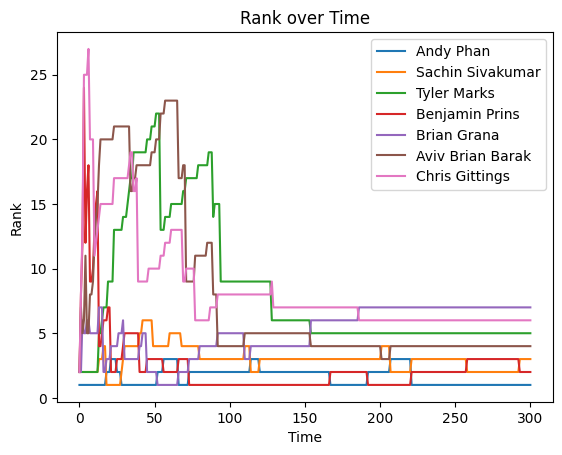

In [13]:
plot_rank_over_time(["Andy Phan", "Sachin Sivakumar", "Tyler Marks", "Benjamin Prins", "Brian Grana", "Aviv Brian Barak", "Chris Gittings"])
